In [24]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})
plt.rcParams['svg.fonttype'] = 'none'
# matplotlib_inline.backend_inline.set_matplotlib_formats("svg")
%config InlineBackend.figure_formats = ['svg'] 

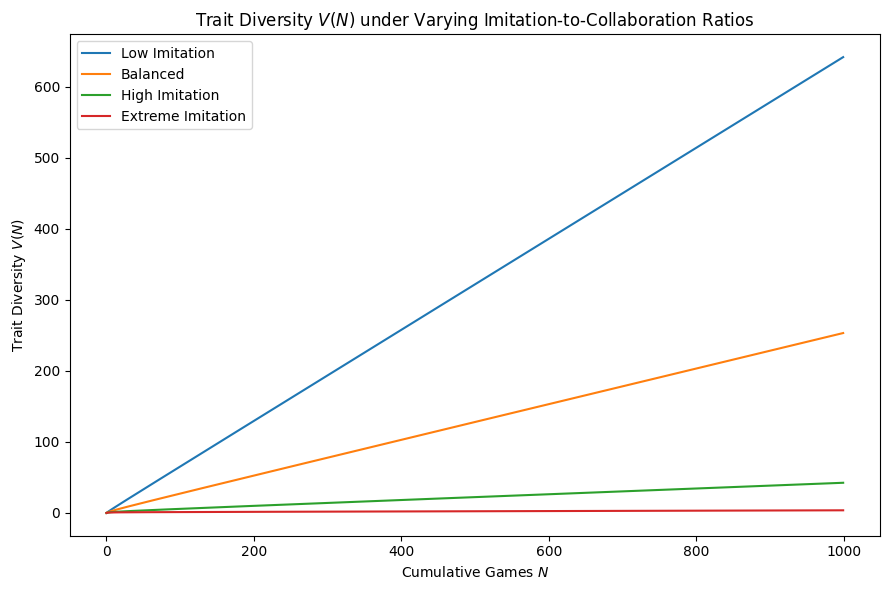

In [7]:
# Simulation parameters
N_max = 1000
alpha = 1.0    # Base innovation rate
beta = 2.0     # Controls sensitivity to imitation saturation

# Bootleg growth rate scenarios: tuples of (bootleg_growth, collab_growth)
scenarios = {
    "Low Imitation":     (0.2, 0.8),
    "Balanced":          (0.5, 0.5),
    "High Imitation":    (0.8, 0.2),
    "Extreme Imitation": (0.95, 0.05)
}

# Setup plot
plt.figure(figsize=(9, 6))

# Run simulations
for label, (b_rate, c_rate) in scenarios.items():
    V = [0]     # Initial diversity
    B = [0]     # Bootlegs
    C = [1]     # Start with 1 collaboration
    
    for n in range(1, N_max):
        B.append(B[-1] + b_rate)
        C.append(C[-1] + c_rate)
        
        imitation_ratio = B[-1] / (B[-1] + C[-1])
        dV = alpha * (1 - imitation_ratio) ** beta
        V.append(V[-1] + dV)

    plt.plot(range(N_max), V, label=label)

# Plot formatting
plt.title("Trait Diversity $V(N)$ under Varying Imitation-to-Collaboration Ratios")
plt.xlabel("Cumulative Games $N$")
plt.ylabel("Trait Diversity $V(N)$")
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.show()

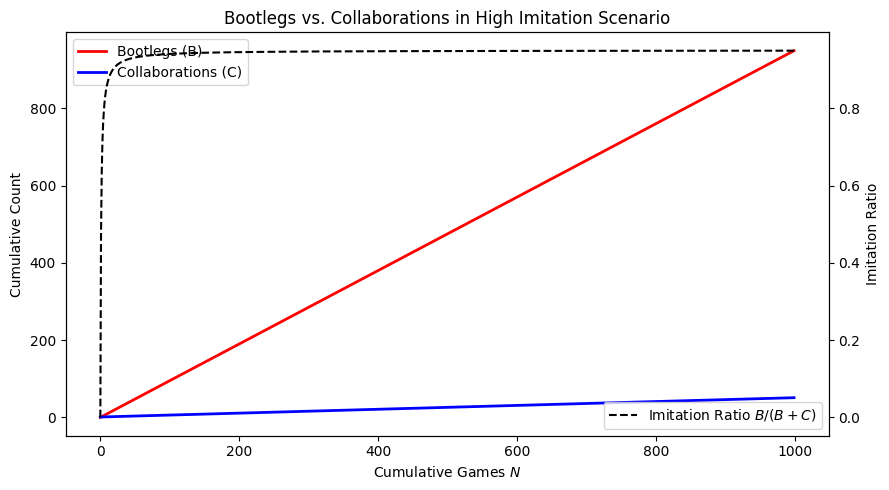

In [6]:
# Parameters
# N_max = 1000
# b_rate = 0.8
# c_rate = 0.2

# Initialize values
B = [0]   # Cumulative bootlegs
C = [1]   # Start with one collaborative game

for n in range(1, N_max):
    B.append(B[-1] + b_rate)
    C.append(C[-1] + c_rate)

N = range(N_max)
imitation_ratio = np.array(B) / (np.array(B) + np.array(C))

# Plotting
fig, ax1 = plt.subplots(figsize=(9, 5))

# Plot bootlegs and collaborations
ax1.plot(N, B, label="Bootlegs (B)", color="red", linewidth=2)
ax1.plot(N, C, label="Collaborations (C)", color="blue", linewidth=2)
ax1.set_xlabel("Cumulative Games $N$")
ax1.set_ylabel("Cumulative Count")
ax1.set_title("Bootlegs vs. Collaborations in High Imitation Scenario")
# ax1.grid(True)
ax1.legend(loc="upper left")

# Add a second axis for the imitation ratio
ax2 = ax1.twinx()
ax2.plot(N, imitation_ratio, '--', color="black", label="Imitation Ratio $B / (B + C)$")
ax2.set_ylabel("Imitation Ratio")
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()

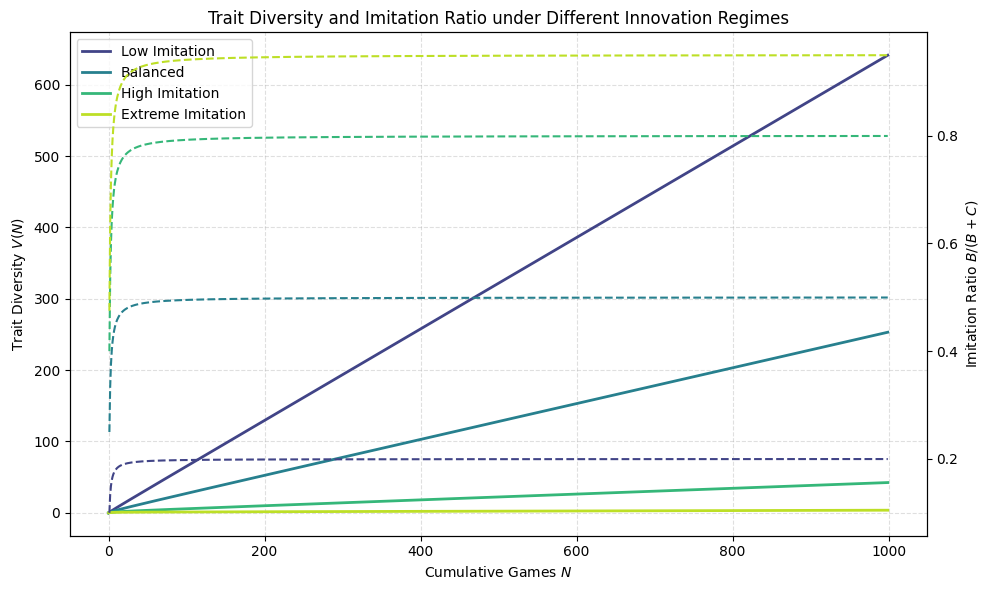

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
N_max = 1000
alpha = 1.0    # Base innovation rate
beta = 2.0     # Controls sensitivity to imitation saturation

# Bootleg-to-collaboration scenarios (bootleg_rate, collab_rate)
scenarios = {
    "Low Imitation":     (0.2, 0.8),
    "Balanced":          (0.5, 0.5),
    "High Imitation":    (0.8, 0.2),
    "Extreme Imitation": (0.95, 0.05)
}

# Colormap to match V(N) and imitation ratio curves
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(scenarios)))

# Setup plot with twin y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each scenario
for i, (label, (b_rate, c_rate)) in enumerate(scenarios.items()):
    color = colors[i]
    V = [0]
    B = [0]
    C = [1]
    imitation_ratios = []

    for n in range(1, N_max):
        B.append(B[-1] + b_rate)
        C.append(C[-1] + c_rate)
        imitation_ratio = B[-1] / (B[-1] + C[-1])
        # imitation_ratio = B[-1] / ( C[-1])
        imitation_ratios.append(imitation_ratio)
        dV = alpha * (1 - imitation_ratio) ** beta
        V.append(V[-1] + dV)

    N_vals = range(N_max)
    ax1.plot(N_vals, V, label=f"{label}", color=color, linewidth=2)
    ax2.plot(N_vals[1:], imitation_ratios, '--', color=color, linewidth=1.5)

# Axis labels and title
ax1.set_xlabel("Cumulative Games $N$")
ax1.set_ylabel("Trait Diversity $V(N)$", color="black")
ax2.set_ylabel("Imitation Ratio $B / (B + C)$", color="black")

# Title and legend
plt.title("Trait Diversity and Imitation Ratio under Different Innovation Regimes")
ax1.legend(loc="upper left")
ax1.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

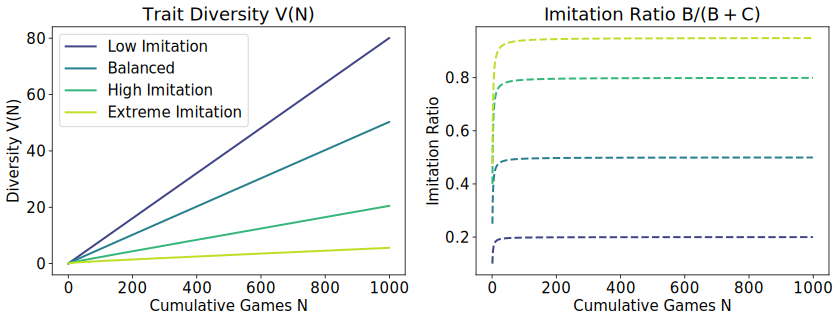

In [25]:
# Simulation parameters
N_max = 1000
alpha = 0.1   # Base innovation rate
beta = 1     # Controls sensitivity to imitation saturation

# Bootleg-to-collaboration scenarios
scenarios = {
    "Low Imitation":     (0.2, 0.8),
    "Balanced":          (0.5, 0.5),
    "High Imitation":    (0.8, 0.2),
    "Extreme Imitation": (0.95, 0.05)
}

# Colormap
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(scenarios)))

# Setup subplot layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Run simulation for each scenario
for i, (label, (b_rate, c_rate)) in enumerate(scenarios.items()):
    color = colors[i]
    V = [0]
    B = [0]
    C = [1]
    imitation_ratios = []

    for n in range(1, N_max):
        B.append(B[-1] + b_rate)
        C.append(C[-1] + c_rate)
        imitation_ratio = B[-1] / (B[-1] + C[-1])
        imitation_ratios.append(imitation_ratio)
        dV = alpha * (1 - imitation_ratio) ** beta
        V.append(V[-1] + dV)

    N_vals = range(N_max)

    # Plot trait diversity
    ax1.plot(N_vals, V, label=label, color=color, linewidth=2)

    # Plot imitation ratio
    ax2.plot(N_vals[1:], imitation_ratios, '--', color=color, linewidth=2)

# Left panel: Trait Diversity
ax1.set_title("Trait Diversity $V(N)$")
ax1.set_xlabel("Cumulative Games $N$")
ax1.set_ylabel("Diversity $V(N)$")
# ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend()

# Right panel: Imitation Ratio
ax2.set_title("Imitation Ratio $B / (B + C)$")
ax2.set_xlabel("Cumulative Games $N$")
ax2.set_ylabel("Imitation Ratio")
# ax2.grid(True, linestyle='--', alpha=0.5)

# Layout
# plt.suptitle("Innovation Dynamics under Varying Imitation-to-Collaboration Ratios", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("fig_model_dynamics.pdf", bbox_inches='tight')
plt.show()